In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
logfile = '/Users/matthewjorden/Documents/Well_Logs/Kansas/MAR/1045399712.csv'
output_file = '/Users/matthewjorden/Documents/Well_Logs/Kansas/MAR/1045399712_edit.csv'


LAS = pd.read_csv(logfile,delim_whitespace=True)

In [3]:
LAS.describe()

,Depth,CNPOR,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,RxoRt,...,SSD,DCAL,ABHV,DT,ITT,MEL15,MEL20,MELCAL,SPOR,TBHV
count,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000,...,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000
mean,1926.500000,13.422850,59.921126,50.225778,-4.661383,-6.716550,2107.968975,29347.523647,37.834144,37.100086,...,1332.002375,-879.148795,29.909519,-183.923361,-243.703387,-832.686509,-833.210500,-237.272287,-226.891844,211.264735
std,1112.481798,93.889365,1158.520628,110.943399,81.183156,81.014071,14302.496711,45526.815995,180.747567,101.238252,...,520.641120,326.429005,626.723513,463.475379,429.186368,377.397761,376.184888,432.997457,438.910944,769.567780
min,0.000000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000
25%,963.250000,15.607200,15.140050,37.982400,1.510200,-0.184450,2.917250,2.541300,0.256100,-25.000700,...,973.699650,-999.250000,2.756000,48.843550,0.000000,-999.250000,-999.250000,4.608800,0.879450,6.546900
50%,1926.500000,22.791200,40.099500,53.707900,2.007600,-0.058700,8.682900,6.584100,4.276700,-6.310400,...,1568.047400,-999.250000,171.106400,68.289600,0.000000,-999.250000,-999.250000,7.907600,14.632000,333.822200
75%,2889.750000,28.815350,68.884500,75.947900,2.444450,0.080300,17.278750,100000.000000,11.667700,149.018300,...,1698.569350,-999.250000,380.088050,84.399050,0.000000,-999.250000,-999.250000,8.739750,26.024800,701.728600
max,3853.000000,100.000000,58594.152300,1746.993800,3.084600,0.339100,100000.000000,100000.000000,2019.940400,502.541400,...,2091.183300,10.737300,848.442000,192.928900,2.000000,71.572300,55.741200,19.270400,102.778600,1318.422700


In [4]:
upper_d = 3200
lower_d = 3500

lower_rhob = 2.2
upper_rhob = 2.95

lower_phi = 0
upper_phi = 30

upper_gr = 175
lower_gr = 0

upper_dt = 140
lower_dt = -200

In [5]:
LAS['SS_ex'] = 2.45
LAS['LS_ex'] = 2.71
LAS['DL_ex'] = 2.85
LAS['Salt_ex'] = 2.3

LAS['GR_Dirty'] = 110
LAS['GR_Clean'] = 20


#LAS.replace([-999.2500],(0))

In [6]:
LAS['DPHI'] = ((LAS['SS_ex'] - LAS['RHOB'])/(1 - LAS['SS_ex'])) * 100

In [7]:
LAS['V_Shale'] = ((LAS['GR']-LAS['GR_Clean'])/(LAS['GR_Dirty']-LAS['GR_Clean']))

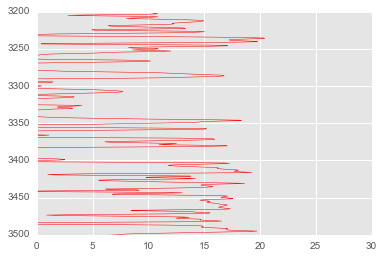

In [8]:
plt.plot(LAS['DPHI'],LAS['Depth'],color='r',linewidth=0.5)
plt.xlim(lower_phi,upper_phi)
plt.ylim(upper_d,lower_d)
plt.gca().invert_yaxis()

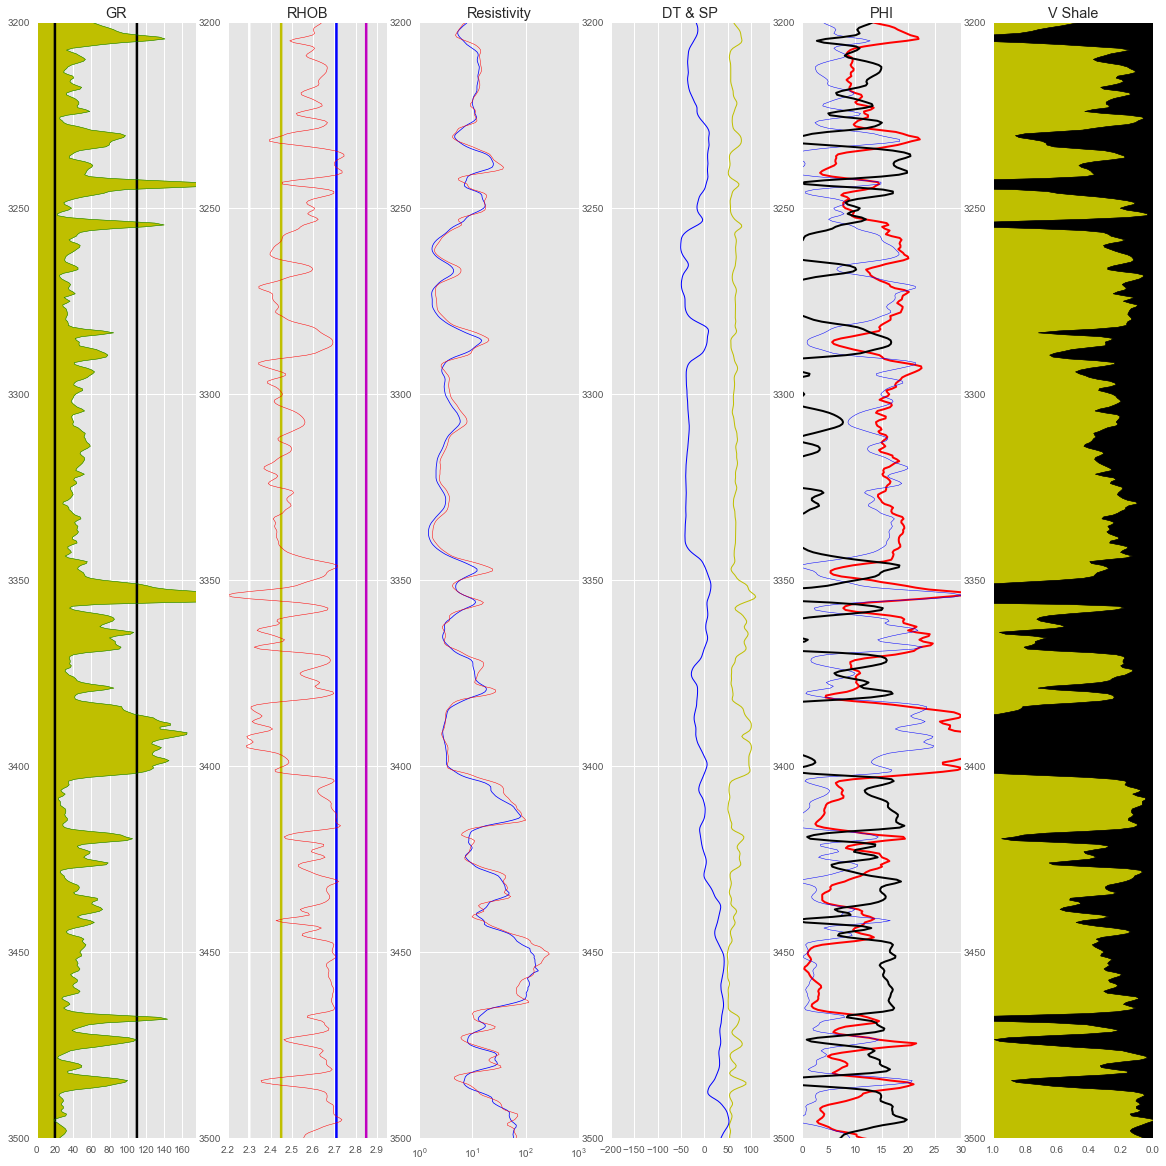

In [9]:



plt.figure(161,figsize=(20,20),dpi=750)



plt.subplot(161)
plt.plot(LAS['GR_Dirty'],LAS['Depth'],color='k',linewidth=2.5)
plt.xlim(lower_gr,upper_gr)
plt.ylim(upper_d,lower_d)
plt.title('GR')
plt.gca().invert_yaxis()

plt.subplot(161)
plt.plot(LAS['GR_Clean'],LAS['Depth'],color='k',linewidth=2.5)
plt.xlim(lower_gr,upper_gr)
plt.ylim(upper_d,lower_d)
plt.title('GR')
plt.gca().invert_yaxis()

plt.subplot(161)
plt.plot(LAS['GR'],LAS['Depth'],color='g',linewidth=0.5)
plt.fill_between(LAS['GR'],LAS['Depth'],  10, color='y')
plt.xlim(lower_gr,upper_gr)
plt.ylim(upper_d,lower_d)
plt.title('GR')
plt.gca().invert_yaxis()



plt.subplot(162)
plt.plot(LAS['SS_ex'],LAS['Depth'],color='y',linewidth=2.5)
plt.xlim(lower_rhob,upper_rhob)
plt.ylim(upper_d,lower_d)
plt.title('RHOB')
plt.gca().invert_yaxis()

plt.subplot(162)
plt.plot(LAS['LS_ex'],LAS['Depth'],color='b',linewidth=2.5)
plt.xlim(1.95,2.95)
plt.ylim(lower_rhob,upper_rhob)
plt.title('RHOB')
plt.gca().invert_yaxis()

plt.subplot(162)
plt.plot(LAS['DL_ex'],LAS['Depth'],color='m',linewidth=2.5)
plt.xlim(lower_rhob,upper_rhob)
plt.ylim(upper_d,lower_d)
plt.title('RHOB')
plt.gca().invert_yaxis()

plt.subplot(162)
plt.plot(LAS['Salt_ex'],LAS['Depth'],color='w',linewidth=2.5)
plt.xlim(lower_rhob,upper_rhob)
plt.ylim(upper_d,lower_d)
plt.title('RHOB')
plt.gca().invert_yaxis()
plt.grid(True)

plt.subplot(162)
plt.plot(LAS['RHOB'],LAS['Depth'],color='r',linewidth=0.5)
plt.xlim(lower_rhob,upper_rhob)
plt.ylim(upper_d,lower_d)
plt.title('RHOB')
plt.gca().invert_yaxis()



plt.subplot(163)
plt.plot(LAS['RILD'],LAS['Depth'],color='b',linewidth=0.75)
plt.xlim(1,1000)
plt.ylim(upper_d,lower_d)
plt.xscale('log')
plt.title('Resistivity')
plt.gca().invert_yaxis()

plt.subplot(163)
plt.plot(LAS['RILM'],LAS['Depth'],color='r',linewidth=0.5)
plt.xlim(1,1000)
plt.ylim(upper_d,lower_d)
plt.xscale('log')
plt.title('Resistivity')
plt.gca().invert_yaxis()



plt.subplot(164)
plt.plot(LAS['DT'],LAS['Depth'],color='y',linewidth=1)
plt.xlim(lower_dt,upper_dt)
plt.ylim(upper_d,lower_d)
plt.title('DT & SP')
plt.gca().invert_yaxis()

plt.subplot(164)
plt.plot(LAS['SP'],LAS['Depth'],color='b',linewidth=1)
plt.xlim(lower_dt,upper_dt)
plt.ylim(upper_d,lower_d)
plt.title('DT & SP')
plt.gca().invert_yaxis()



plt.subplot(165)
plt.plot(LAS['CNPOR'],LAS['Depth'],color='r',linewidth=2)
plt.title('PHI')
plt.gca().invert_yaxis()

plt.subplot(165)
plt.plot(LAS['DPOR'],LAS['Depth'],color='b',linewidth=0.5)
plt.xlim(lower_phi,upper_phi)
plt.ylim(upper_d,lower_d)
plt.gca().invert_yaxis()

plt.subplot(165)
plt.plot(LAS['DPHI'],LAS['Depth'],color='k',linewidth=2)
plt.xlim(lower_phi,upper_phi)
plt.ylim(upper_d,lower_d)
plt.gca().invert_yaxis()


plt.subplot(166, axisbg='y')
plt.plot(LAS['V_Shale'],LAS['Depth'],color='k',linewidth=0.5)
plt.fill_between(LAS['V_Shale'],LAS['Depth'],  10, color='k')
# plt.fill_between(LAS['V_Shale'],LAS['Depth'],  0, color='y')
plt.xlim(0,1)
plt.ylim(upper_d,lower_d)
plt.title('V Shale')
plt.grid(False)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

(0, 175)

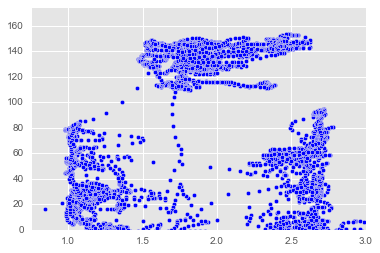

In [10]:
plt.scatter(LAS['RHOB'],LAS['SP'])
plt.xlim(0.75,3)
plt.ylim(0,175)

In [11]:
LAS.to_csv(output_file,sep = ",")